In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


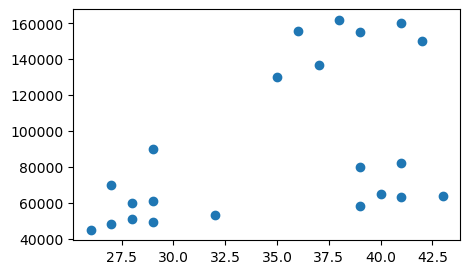

In [3]:
%matplotlib inline

plt.figure(figsize=(5,3))
plt.scatter(df.Age,df['Income($)'])
plt.show()

In [4]:
# df.drop('Name',inplace=True, axis=1)

## Scale the data using MinMaxScaler

In [5]:
scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


## Applying KMeans model

In [17]:
model = KMeans(n_clusters=3,n_init='auto')

In [18]:
pred = model.fit_predict(df[['Age','Income($)']])
pred

C:\Users\Nikhil Vishwakarma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [19]:
df['clusters'] = pred
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


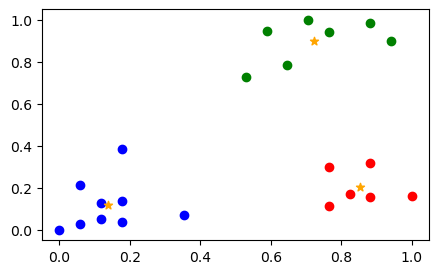

In [32]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.figure(figsize=(5,3))

plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='green')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*',color='orange')
plt.show()

## Elbow Plot

In [34]:
kml = range(1,11)
sse = []
for i in kml:
    model = KMeans(n_clusters=i)
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_)

C:\Users\Nikhil Vishwakarma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nikhil Vishwakarma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nikhil Vishwakarma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nikhil Vishwakarma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

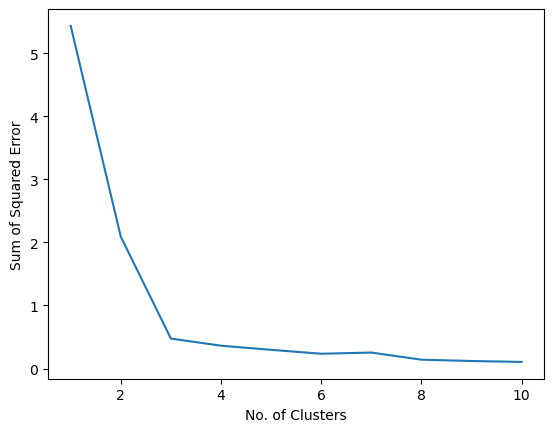

In [36]:
plt.plot(kml,sse)
plt.ylabel('Sum of Squared Error')
plt.xlabel('No. of Clusters')
plt.show()